In [1]:
using DataFrames, CSV
using ScikitLearn

In [2]:
function prox_l1(x::Number, alpha=1)
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

In [3]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 1/(2*norm(X))^2, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
        # prox step
        w = prox_l1(w, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1))
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

In [33]:
function stoch_proxgrad_quad_l1(X, y; maxiters = 50, stepsize = 1/(2*norm(X))^2, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    n = size(X,1)
    for i=1:maxiters
        # pick random example r
        r = rand(1:n)
        x_r = X[r,:]
        # stochastic gradient step
        g = n*(y[r] - dot(w,x_r))*x_r
        w = w + stepsize*g
        # prox step
        w = prox_l1(w, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1))
    end
    return w, objval
end

stoch_proxgrad_quad_l1 (generic function with 1 method)

In [103]:
tap_train_2003 = readtable("TAP_train_2003.csv");

In [6]:
size(tap_train_2003)

(11472, 43)

In [68]:
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [24]:
X_train_2003 = convert(Array,tap_train_2003[:,1:42]);
y_train_2003 = convert(Array,tap_train_2003[:,43]);

In [34]:
w_2003, obj_2003 = stoch_proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 50, stepsize = 1/(2*norm(X_train_2003))^2, λ = 0.01)

([0.0297965, 1.47415e-5, 9.16169e-6, 4.6069e-6, 1.48759e-5, 7.74754e-6, 6.11552e-6, 8.784e-7, 1.34464e-7, 0.0  …  0.0, 0.0, 4.60257e-7, 3.93528e-7, 6.24842e-7, 0.0, 6.8665e-8, 6.57987e-8, 0.032389, 1.48759e-5], [7.12259e10, 7.10987e10, 6.91522e10, 6.69155e10, 6.64525e10, 6.58401e10, 6.69533e10, 7.23357e10, 6.58551e10, 6.60293e10  …  6.56055e10, 6.66775e10, 6.528e10, 6.50904e10, 6.51506e10, 6.49111e10, 6.47758e10, 6.47712e10, 6.5428e10, 6.53167e10])

In [35]:
w_2003, obj_2003 = stoch_proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 50, stepsize = 1/(2*norm(X_train_2003))^2, λ = 0.001)

([0.0245134, 1.24118e-5, 6.87991e-6, 3.18859e-6, 1.22383e-5, 5.93685e-6, 5.46484e-6, 1.01013e-6, -1.73471e-7, 0.0  …  0.0, 0.0, 5.043e-7, 1.52171e-6, 6.83699e-7, 0.0, -1.73471e-7, 0.0, 0.0240212, 1.22383e-5], [6.97061e10, 6.65976e10, 6.62738e10, 6.6271e10, 6.64176e10, 6.82753e10, 6.93988e10, 7.58668e10, 7.92181e10, 8.09342e10  …  6.5074e10, 6.50088e10, 7.07768e10, 6.91705e10, 6.73775e10, 6.70092e10, 6.49834e10, 6.54514e10, 6.81345e10, 6.4864e10])

In [36]:
w_2003, obj_2003 = stoch_proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 50, stepsize = 1/(2*norm(X_train_2003))^2, λ = 1)

([0.0242578, 1.20486e-5, 8.31809e-6, 3.8976e-6, 1.21108e-5, 3.78681e-6, 5.61412e-6, 2.64763e-6, 6.21891e-8, 0.0  …  0.0, 0.0, 4.95518e-7, 0.0, 9.41174e-7, 0.0, 6.07928e-8, 1.39579e-9, 0.0231332, 1.21108e-5], [7.54908e10, 6.92059e10, 6.92007e10, 6.75197e10, 7.02518e10, 7.10666e10, 7.01742e10, 6.75017e10, 6.62158e10, 7.42147e10  …  6.9901e10, 6.59763e10, 6.8138e10, 6.634e10, 6.62657e10, 6.52961e10, 6.52921e10, 6.52644e10, 6.67388e10, 6.49147e10])

In [37]:
w_2003, obj_2003 = stoch_proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 100, stepsize = 1/(2*norm(X_train_2003))^2, λ = 1)

([0.0618806, 3.10811e-5, 1.69061e-5, 1.07516e-5, 3.0894e-5, 1.3894e-5, 1.02212e-5, 6.91355e-6, -1.8718e-7, 5.23658e-8  …  0.0, 0.0, 1.44248e-7, 6.43545e-7, 8.14932e-7, 0.0, -1.73371e-7, -1.3809e-8, 0.0212742, 3.0894e-5], [7.35051e10, 7.14422e10, 7.09595e10, 6.80842e10, 7.16974e10, 6.6989e10, 6.68629e10, 6.83453e10, 6.82116e10, 6.64373e10  …  6.61441e10, 6.64963e10, 6.65205e10, 6.63016e10, 6.26018e10, 6.25605e10, 6.2882e10, 6.36647e10, 6.33469e10, 6.25659e10])

In [38]:
w_2003, obj_2003 = proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 100, stepsize = 1/(2*norm(X_train_2003))^2, λ = 1)

([0.114385, 5.72045e-5, 3.26279e-5, 1.94647e-5, 5.7086e-5, 2.94289e-5, 2.1683e-5, 6.07298e-6, -9.77223e-8, 1.9671e-8  …  2.15718e-9, 1.24522e-8, 1.18683e-6, 8.38553e-7, 5.4722e-6, 3.63719e-9, -1.4036e-7, 4.26371e-8, 0.021078, 5.71068e-5], [6.86066e10, 6.67769e10, 6.62632e10, 6.60786e10, 6.59763e10, 6.58947e10, 6.58183e10, 6.57433e10, 6.56687e10, 6.55943e10  …  5.99015e10, 5.98351e10, 5.97688e10, 5.97027e10, 5.96366e10, 5.95706e10, 5.95047e10, 5.94389e10, 5.93732e10, 5.93076e10])

In [39]:
tap_test_2003 = readtable("TAP_test_2003.csv");

In [40]:
size(tap_test_2003)

(2868, 43)

In [41]:
X_test_2003 = convert(Array,tap_test_2003[:,1:42]);
y_test_2003 = convert(Array,tap_test_2003[:,43]);

In [42]:
function mean_abs_err(X,y,w)
    n = size(X,1)
    sum = 0
    for i=1:n
        sum += abs(y[i] - X[i,:]'*w)
    end
    return (sum+0.0)/n
end

mean_abs_err (generic function with 1 method)

In [43]:
function mean_abs_percent(X,y,w)
    n = size(X,1)
    sum = 0
    for i=1:n
        sum += abs((y[i] - X[i,:]'*w)/y[i])
    end
    return 100*(sum+0.0)/n
end

mean_abs_percent (generic function with 1 method)

In [44]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_2003)

1860.1030663101305

In [45]:
MAE_test_2003 = mean_abs_err(X_test_2003, y_test_2003, w_2003)

1861.2317889695496

In [46]:
MAPD_train_2003 = mean_abs_percent(X_train_2003, y_train_2003, w_2003)

116.10863382872678

In [47]:
MAPD_test_2003 = mean_abs_percent(X_test_2003, y_test_2003, w_2003)

114.70814402690868

In [48]:
w_2003[1:15]

15-element Array{Float64,1}:
  0.114385  
  5.72045e-5
  3.26279e-5
  1.94647e-5
  5.7086e-5 
  2.94289e-5
  2.1683e-5 
  6.07298e-6
 -9.77223e-8
  1.9671e-8 
  8.72725e-6
  2.16412e-6
  1.04802e-5
  3.10743e-6
  1.34571e-5

In [49]:
w_2003[16:30]

15-element Array{Float64,1}:
 1.29624e-5
 3.27458e-6
 2.93374e-6
 0.0       
 1.49123e-5
 1.62251e-5
 9.18323e-6
 5.09334e-6
 1.16929e-5
 4.9563e-5 
 7.54386e-6
 0.0       
 5.71386e-6
 0.0       
 1.65769e-5

In [50]:
w_2003[31:42]

12-element Array{Float64,1}:
  2.73954e-5
  2.52613e-9
  2.15718e-9
  1.24522e-8
  1.18683e-6
  8.38553e-7
  5.4722e-6 
  3.63719e-9
 -1.4036e-7 
  4.26371e-8
  0.021078  
  5.71068e-5

In [71]:
X_train_2003 = convert(Array{Float64},tap_train_2003[:,2:42]);
y_train_2003 = convert(Array,tap_train_2003[:,43]);

In [54]:
w_2003, obj_2003 = proxgrad_quad_l1(X_train_2003,y_train_2003; maxiters = 100, stepsize = 1/(2*norm(X_train_2003))^2, λ = 1)

([5.92729e-5, 3.37007e-5, 2.01475e-5, 5.93153e-5, 3.05409e-5, 2.24254e-5, 6.28092e-6, 6.85507e-8, 2.56907e-8, 9.09856e-6  …  2.58536e-9, 1.61327e-8, 1.26641e-6, 8.87762e-7, 5.75569e-6, 4.47863e-9, -1.31866e-8, 8.1738e-8, 0.0260636, 5.93414e-5], [6.87378e10, 6.69974e10, 6.65622e10, 6.64535e10, 6.64263e10, 6.64195e10, 6.64178e10, 6.64173e10, 6.64172e10, 6.64172e10  …  6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10, 6.64172e10])

In [55]:
w_2003[1:15]

15-element Array{Float64,1}:
 5.92729e-5
 3.37007e-5
 2.01475e-5
 5.93153e-5
 3.05409e-5
 2.24254e-5
 6.28092e-6
 6.85507e-8
 2.56907e-8
 9.09856e-6
 2.31688e-6
 1.09113e-5
 3.31399e-6
 1.39247e-5
 1.33722e-5

In [56]:
w_2003[16:30]

15-element Array{Float64,1}:
 3.37296e-6
 3.03086e-6
 0.0       
 1.54663e-5
 1.68994e-5
 9.5809e-6 
 5.29609e-6
 1.20987e-5
 5.13454e-5
 7.99609e-6
 0.0       
 5.97795e-6
 0.0       
 1.71873e-5
 2.81717e-5

In [58]:
w_2003[31:41]

11-element Array{Float64,1}:
  2.95504e-9
  2.58536e-9
  1.61327e-8
  1.26641e-6
  8.87762e-7
  5.75569e-6
  4.47863e-9
 -1.31866e-8
  8.1738e-8 
  0.0260636 
  5.93414e-5

In [59]:
X_test_2003 = convert(Array,tap_test_2003[:,2:42]);
y_test_2003 = convert(Array,tap_test_2003[:,43]);

In [60]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_2003)

1974.3491170697926

In [61]:
MAE_test_2003 = mean_abs_err(X_test_2003, y_test_2003, w_2003)

1974.449639926477

In [62]:
MAPD_train_2003 = mean_abs_percent(X_train_2003, y_train_2003, w_2003)

118.15248553414207

In [63]:
MAPD_test_2003 = mean_abs_percent(X_test_2003, y_test_2003, w_2003)

116.71704321687065

In [107]:
n = length(y_train_2003)
w_quad = proxgrad(1/n*QuadLoss(), ZeroReg(), X_train_2003, y_train_2003, maxiters=1000)

41-element Array{Float64,1}:
  0.00126258 
  0.000719136
  0.000426993
  0.00126335 
  0.000650938
  0.000476557
  0.000134607
  1.33022e-6 
  4.79239e-7 
  0.000193954
  4.90608e-5 
  0.000231986
  6.97743e-5 
  ⋮          
  0.000598967
  6.35687e-8 
  5.56211e-8 
  3.44347e-7 
  2.71972e-5 
  1.90714e-5 
  0.000123627
  9.62653e-8 
 -4.17982e-7 
  1.7482e-6  
  0.0260634  
  0.00126391 

In [105]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_quad)

1974.3458897390344

In [106]:
MAE_test_2003 = mean_abs_err(X_test_2003, y_test_2003, w_quad)

1974.4464205560043

In [99]:
MAPD_train_2003 = mean_abs_percent(X_train_2003, y_train_2003, w_quad)

118.15235240955128

In [100]:
MAPD_test_2003 = mean_abs_percent(X_test_2003, y_test_2003, w_quad)

116.71690944016731

In [101]:
w_l1 = proxgrad(1/n*L1Loss(), ZeroReg(), X_train_2003, y_train_2003, maxiters=1000)

41-element Array{Float64,1}:
 2.0446e-6  
 1.05945e-6 
 6.8471e-7  
 2.07964e-6 
 1.07418e-6 
 7.6965e-7  
 1.94689e-7 
 3.86293e-8 
 6.07411e-9 
 3.32943e-7 
 1.2958e-7  
 3.87728e-7 
 1.73527e-7 
 ⋮          
 8.58792e-7 
 3.24767e-10
 3.24767e-10
 2.28112e-9 
 6.43039e-8 
 3.8972e-8  
 2.28961e-7 
 6.49534e-10
 1.77676e-8 
 2.08617e-8 
 0.0107526  
 2.08323e-6 

In [102]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_l1)

1876.158519559397

In [88]:
w_huber = proxgrad(1/n*HuberLoss(), ZeroReg(), X_train_2003, y_train_2003, maxiters=1000)

41-element Array{Float64,1}:
 2.02811e-6 
 1.05146e-6 
 6.79758e-7 
 2.06311e-6 
 1.06512e-6 
 7.63873e-7 
 1.93064e-7 
 3.85578e-8 
 6.04775e-9 
 3.30189e-7 
 1.28265e-7 
 3.84883e-7 
 1.71872e-7 
 ⋮          
 8.52521e-7 
 3.22131e-10
 3.22131e-10
 2.26531e-9 
 6.3782e-8  
 3.86557e-8 
 2.27102e-7 
 6.44262e-10
 1.79518e-8 
 2.0606e-8  
 0.010742   
 2.06666e-6 

In [90]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_huber)

1876.1597579847496

In [108]:
using Convex
using PyPlot
using ECOS
set_default_solver(ECOSSolver(verbose=0))

ECOS.ECOSSolver(Any[(:verbose, 0)])

In [109]:
function ridge_regression(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*sumsquares(w))
    solve!(p)
    return w.value
end

ridge_regression (generic function with 1 method)

In [110]:
function lasso(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*norm(w,1))
    solve!(p)
    return w.value
end

lasso (generic function with 1 method)

In [139]:
w = ridge_regression(X_train_2003,y_train_2003; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
 843.635    
 470.759    
 270.3      
 816.88     
 410.668    
 337.248    
  96.5195   
 -27.3873   
  -0.800477 
 130.972    
  17.7011   
 164.412    
  32.4042   
   ⋮        
 433.361    
  -0.0327313
  -0.0443998
  -0.497599 
  11.8508   
   9.92814  
  71.661    
  -0.0577383
 -23.5504   
  -3.83681  
  -0.0746932
 816.258    

In [140]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_err(::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[42]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[140], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 698.886

In [141]:
MAE_test_2003 = mean_abs_err(X_test_2003, y_test_2003, w)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_err(::Array{Real,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[42]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[141], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 703.211

In [144]:
MAPD_train_2003 = mean_abs_percent(X_train_2003, y_train_2003, w)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_percent(::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[43]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[144], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 133.449

In [113]:
w_lasso = lasso(X_train_2003,y_train_2003)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
 -67547.4      
      1.08297e5
    331.91     
  93926.8      
  86703.0      
  86391.0      
  86413.3      
      2.79417e5
  65143.4      
 144339.0      
      1.42022e5
      1.4498e5 
      1.43479e5
      ⋮        
      2.54671e5
     -7.25844e5
     -8.14462e5
      3.9254e5 
  85005.7      
  86255.7      
  87731.6      
     -2.6975e5 
  -9991.22     
     -1.76498e5
     -0.0653548
     -2.0347e5 

In [114]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_lasso)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_err(::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[42]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[114], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 1354.17

In [115]:
function nnls(X,y)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y), w>=0)
    solve!(p)
    return w.value
end

nnls (generic function with 1 method)

In [116]:
w_nnls = nnls(X_train_2003,y_train_2003)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
   125.613     
   254.143     
   214.896     
   117.288     
   237.508     
   309.536     
   977.399     
   529.05      
  4316.93      
   612.235     
   785.395     
   490.927     
   594.969     
     ⋮         
   359.701     
     1.36421e5 
     1.36636e5 
 16127.4       
  1622.98      
  2592.45      
   809.968     
 75369.0       
   737.48      
  2114.72      
    -0.00197232
   116.809     

In [117]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_nnls)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_err(::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[42]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[117], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 1462.94

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

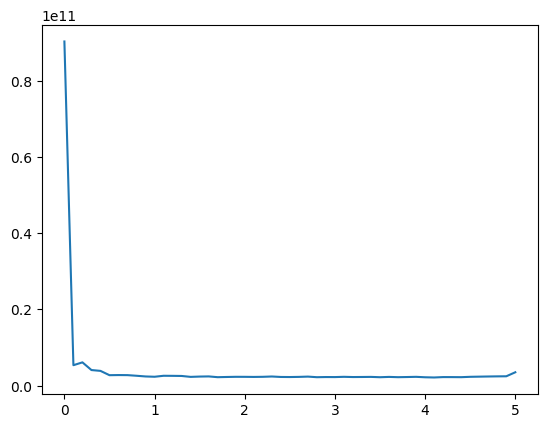

Problem status Infeasible; solution may be inaccurate.


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1510c2810>

In [145]:
error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X_train_2003,y_train_2003; λ=λ)
    push!(error, sum((y_test_2003 - X_test_2003*w).^2))
end
plot(λs, error)

In [146]:
tap_train = readtable("TAP_train.csv");

In [147]:
size(tap_train)

(152771, 43)

In [148]:
X_train = convert(Array,tap_train[:,1:42]);
y_train = convert(Array,tap_train[:,43]);

In [151]:
w = ridge_regression(X_train,y_train; λ=0)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

42×1 Array{Float64,2}:
    -1.04552 
  1685.95    
  1562.68    
   992.225   
   113.615   
    -0.111848
   189.545   
  1144.99    
   375.34    
 -1692.71    
   -25.8314  
  -246.669   
  -686.087   
     ⋮       
   142.988   
  3956.65    
    -6.73872 
    -5.8524  
   -87.7827  
  -418.386   
  -223.96    
  -902.427   
   -21.9047  
 -1327.98    
  -366.635   
    -8.66391 

In [152]:
MAE_train = mean_abs_err(X_train, y_train, w)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::RowVector{Float64,Array{Float64,1}}) at ./deprecated.jl:57
 [3] mean_abs_err(::Array{Real,2}, ::Array{Float64,1}, ::Array{Float64,2}) at ./In[42]:5
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/tiffanyshih/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/tiffanyshih/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[152], in expression starting on line 1


1×1 RowVector{Float64,Array{Float64,1}}:
 2420.69